### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [71]:
data = pd.read_csv('data/coupons.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [72]:
data.head(50)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [73]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [74]:
data = data.drop('car', axis=1)

4. What proportion of the total observations chose to accept the coupon?



<Axes: xlabel='Y', ylabel='percent'>

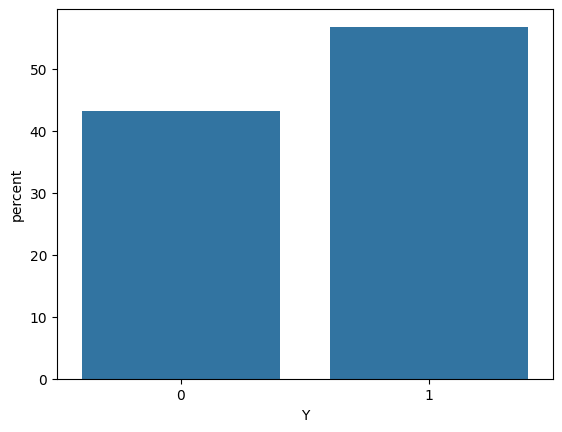

In [75]:
sns.countplot(data, x='Y',stat="percent")

5. Use a bar plot to visualize the `coupon` column.

<Axes: ylabel='coupon'>

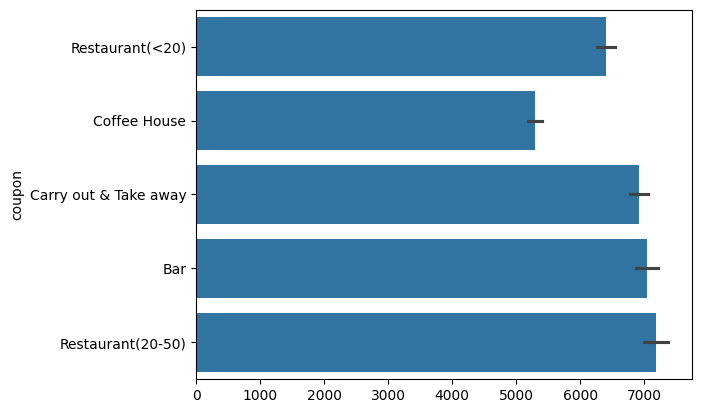

In [76]:
sns.barplot(data['coupon'])

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

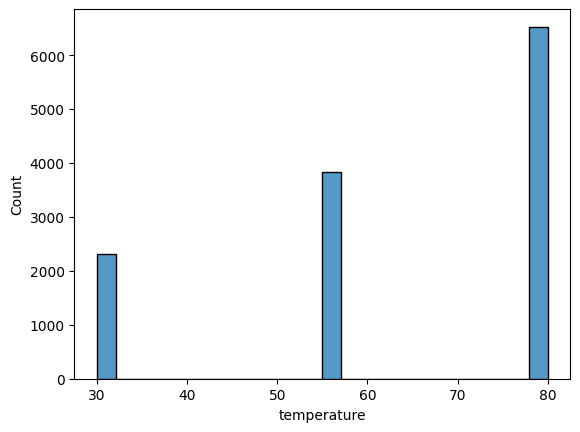

In [77]:
sns.histplot(data['temperature'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [78]:
a = data[data['coupon']=='Bar']
type(a)
a.value_counts()

destination      passanger  weather  temperature  time  coupon  expiration  gender  age      maritalStatus      has_children  education                               occupation                       income           Bar    CoffeeHouse  CarryAway  RestaurantLessThan20  Restaurant20To50  toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  direction_opp  Y
No Urgent Place  Friend(s)  Rainy    55           10PM  Bar     2h          Female  31       Married partner    0             Some college - no degree                Computer & Mathematical          $100000 or More  less1  less1        gt8        4~8                   less1             1                 1                  0                  0               1              0    2
Home             Alone      Sunny    80           6PM   Bar     2h          Male    46       Married partner    1             Graduate degree (Masters or Doctorate)  Management                       $87500 - $99999  less1  1~3          1~3    

2. What proportion of bar coupons were accepted?


<Axes: xlabel='Y', ylabel='percent'>

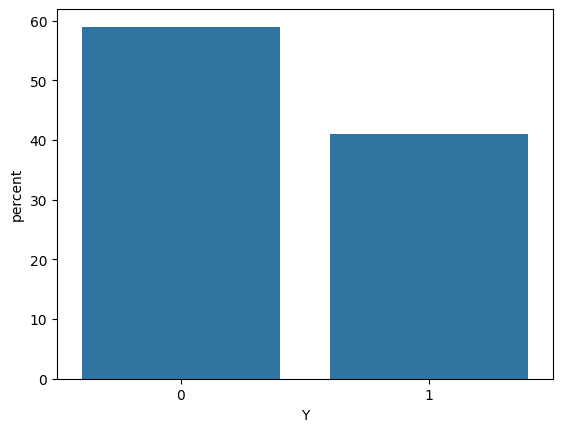

In [79]:
sns.countplot(a, x='Y',stat="percent")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [80]:
df_with_bar_3_or_less = a[a['Bar'].isin(['never', 'less1', '1~3'])]
df_with_bar_more_than_3 = a[a['Bar'].isin(['4~8', 'gt8'])]
print("acceptance rate with bar 3 or fewer time is {} %".format(df_with_bar_3_or_less["Y"].mean()*100 ))
print("acceptance rate with bar more than 3 time is {} %".format(df_with_bar_more_than_3["Y"].mean()*100 ))
#print(df_with_bar_more_than_3["Y"].mean()*100+"%")

acceptance rate with bar 3 or fewer time is 37.061769616026716 %
acceptance rate with bar more than 3 time is 76.88442211055276 %


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [81]:
#b = a[(a['Bar'].isin([ '1~3', '4~8', 'gt8']) & (a['age']<=25))]
unique_values = a['age'].unique()
print(unique_values)
a['age'] = a['age'].replace({'below21': 20, '50plus': 50}).astype(int)
driver_over25 = a[(a['Bar'].isin([ '1~3', '4~8', 'gt8']) & (a['age']<25))]["Y"].mean()
driver_under25 = a[~(a['Bar'].isin([ '1~3', '4~8', 'gt8']) & (a['age']<25))]["Y"].mean()
print("acceptance rate with driver under 25 is {} %".format(driver_under25*100 ))
print("acceptance rate with driver over 25 is {} %".format(driver_over25*100 ))

['21' '46' '26' '31' '41' '50plus' '36' 'below21']
acceptance rate with driver under 25 is 38.51167843563281 %
acceptance rate with driver over 25 is 67.04545454545455 %


/var/folders/bg/4cvrx_n56lzf7nnxq5prfydh0000gq/T/ipykernel_12331/123239632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['age'] = a['age'].replace({'below21': 20, '50plus': 50}).astype(int)


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [100]:
unique_values = data['coupon'].unique()
print(unique_values)

driver_without_kid = data[(   (data['Bar'].isin([ '1~3', '4~8', 'gt8'])) & ~(data['passanger'] != "Kid(s)" ) & ~(data['occupation'].isin([ "farming", "fishing", "forestry"])))]["Y"].mean()
driver_with_kid = data[~(   (data['Bar'].isin([ '1~3', '4~8', 'gt8'])) & ~(data['passanger'] != "Kid(s)" ) & ~(data['occupation'].isin([ "farming", "fishing", "forestry"])))]["Y"].mean()
print("acceptance rate with driver without kid passengers is {} %".format(driver_without_kid*100 ))
print("acceptance rate with driver with kid passengers is {} %".format(driver_with_kid*100 ))

['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
acceptance rate with driver without kid passengers is 60.396039603960396 %
acceptance rate with driver with kid passengers is 56.7857715109758 %


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [97]:
data['age_num'] =  data['age'].replace({'below21': 20, '50plus': 50}).astype(int)
unique_values = a['income'].unique()
print(unique_values)
driver_with_criteria1 = data[(data['Bar'].isin([ '1~3', '4~8', 'gt8'])) & (data['passanger'] != "Kid(s)" ) & ((data['maritalStatus'] != 'Widowed'))]["Y"].mean()
driver_with_criteria2 = data[(data['Bar'].isin([ '1~3', '4~8', 'gt8'])) & (data['age_num'] < 30) ]["Y"].mean()
driver_with_criteria3 = data[(data['RestaurantLessThan20'].isin([  '4~8', 'gt8'])) & (data['income'].isin(['Less than $12500','$12500 - $24999', '$25000 - $37499','$37500 - $49999' ]))]["Y"].mean()
print("acceptance rate with driver with criteria 1 is {} %".format(driver_with_criteria1*100 ))
print("acceptance rate with driver with criteria 2 is {} %".format(driver_with_criteria2*100 ))
print("acceptance rate with driver with criteria 3 is {} %".format(driver_with_criteria3*100 ))


['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
acceptance rate with driver with criteria 1 is 62.310606060606055 %
acceptance rate with driver with criteria 2 is 62.808098591549296 %
acceptance rate with driver with criteria 3 is 60.07020623080298 %


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Criteria1: driver with more than once bar visits, without kid passengers, and not widowed
Based on the above data drivers with more than once bar visits, without kid passengers, and not widowed are most likely to accept the coupons 62% of the time. 


Criteria2: driver with more than once bar visits bar visits, age below 30
Based on the above data driver with more than once bar visits bar visits, age below 30 will accept coupons more than 62% of the time.

Criteria3: driver with more than 4 cheap restaurant visits, income less than $50,000
Based on the above data driver with more than 4 cheap restaurant visits, income less than $50,000 will accept coupons more than 60% of the time.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Below we can see that Bar and Coffee coupons are popular mosly amongs younger drivers. As age increases chances of driver accepting coupon also reduces.

Text(0.5, 1.0, 'Bar or Coffee coupon accepted by Age')

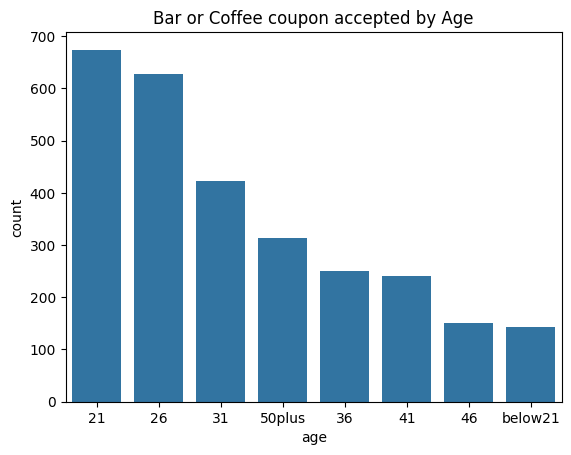

In [112]:
data_accepted_coffee_bar = data[(data['coupon'].isin(['Coffee House', 'Bar'])) & (data['Y']==1)]
sns.countplot(x='age', data=data_accepted_coffee_bar,  order = data_accepted_coffee_bar['age'].value_counts().index)
plt.title('Bar or Coffee coupon accepted by Age')

Below we can see that Bar and Coffee coupons are popular mosly amongs single and married partner. Chances of accepting Bar and coffee coupon reduces in Divorced and widowed.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Single'),
  Text(1, 0, 'Married partner'),
  Text(2, 0, 'Unmarried partner'),
  Text(3, 0, 'Divorced'),
  Text(4, 0, 'Widowed')])

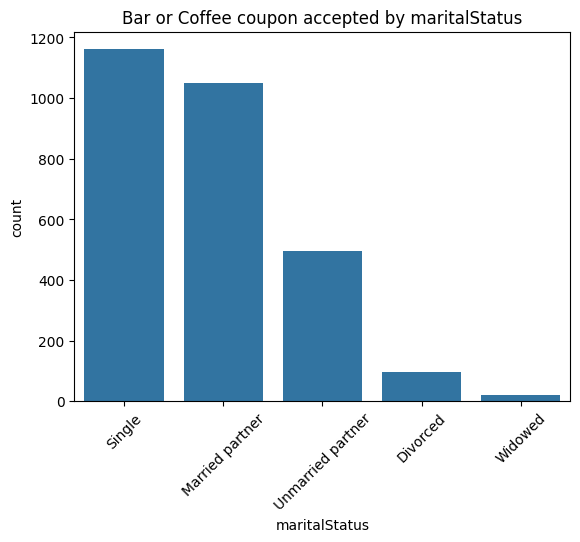

In [110]:
sns.countplot(x='maritalStatus', data=data_accepted_coffee_bar,  order = data_accepted_coffee_bar['maritalStatus'].value_counts().index)
plt.title('Bar or Coffee coupon accepted by maritalStatus')
plt.xticks(rotation=45)

In below analysis we can see that Bar and Coffee coupons follow gaussian curve for driver education i.e. less educated drivers accept less coupons ..As education increases percentage of driver accept coupon also increases but this percent is less amongs highly educated drivers.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Some college - no degree'),
  Text(1, 0, 'Bachelors degree'),
  Text(2, 0, 'Graduate degree (Masters or Doctorate)'),
  Text(3, 0, 'Associates degree'),
  Text(4, 0, 'High School Graduate'),
  Text(5, 0, 'Some High School')])

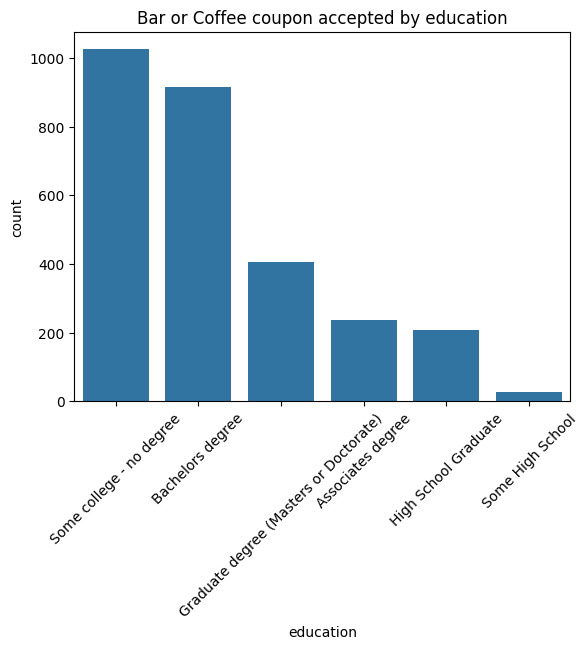

In [111]:
sns.countplot(x='education', data=data_accepted_coffee_bar,  order = data_accepted_coffee_bar['education'].value_counts().index)
plt.title('Bar or Coffee coupon accepted by education')
plt.xticks(rotation=45)